In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("/content/iris.csv")

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head(15)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [5]:
df.shape

(149, 5)

In [6]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [9]:
df['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [39]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


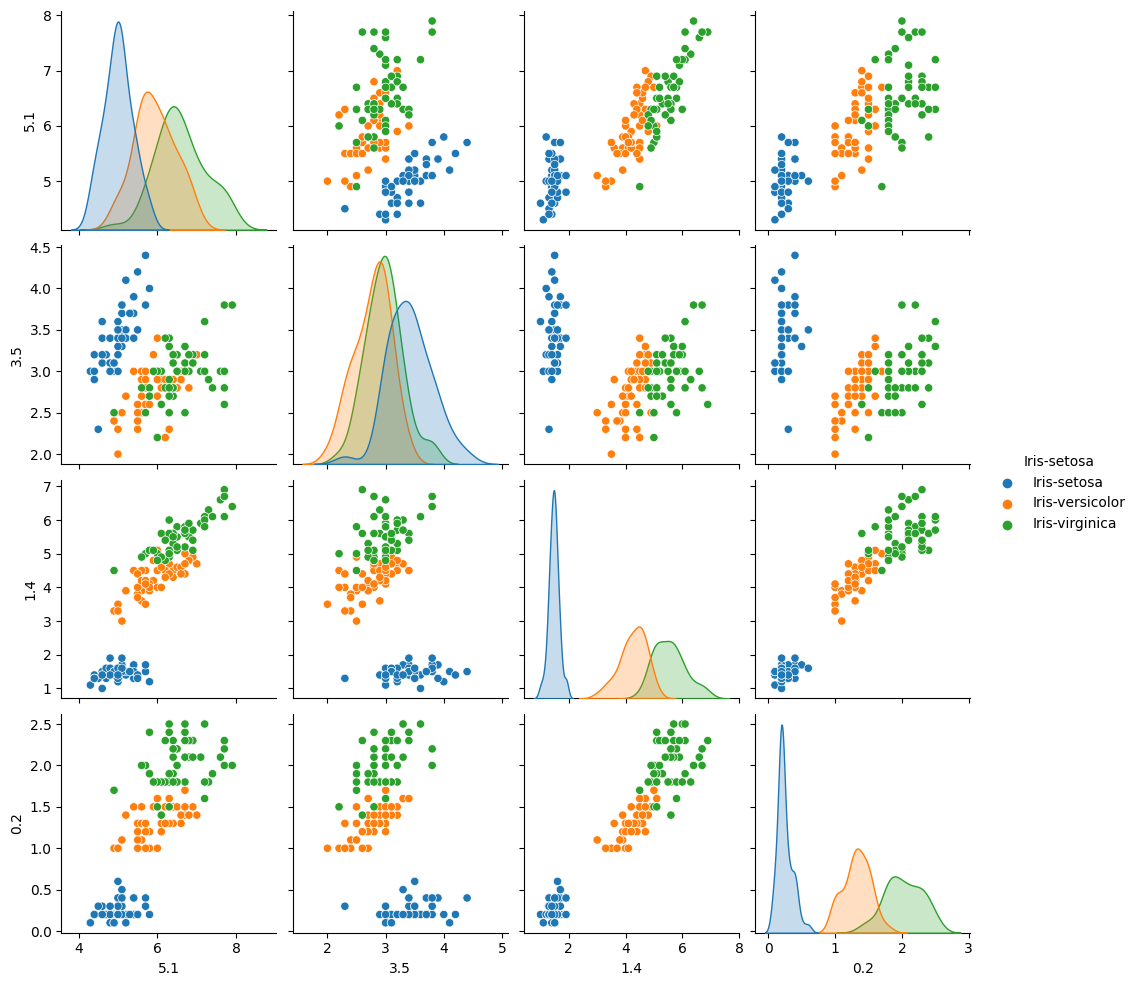

In [40]:
#Data VIsualisation 
sns.pairplot(df,hue="Iris-setosa")

<Axes: xlabel='5.1', ylabel='1.4'>

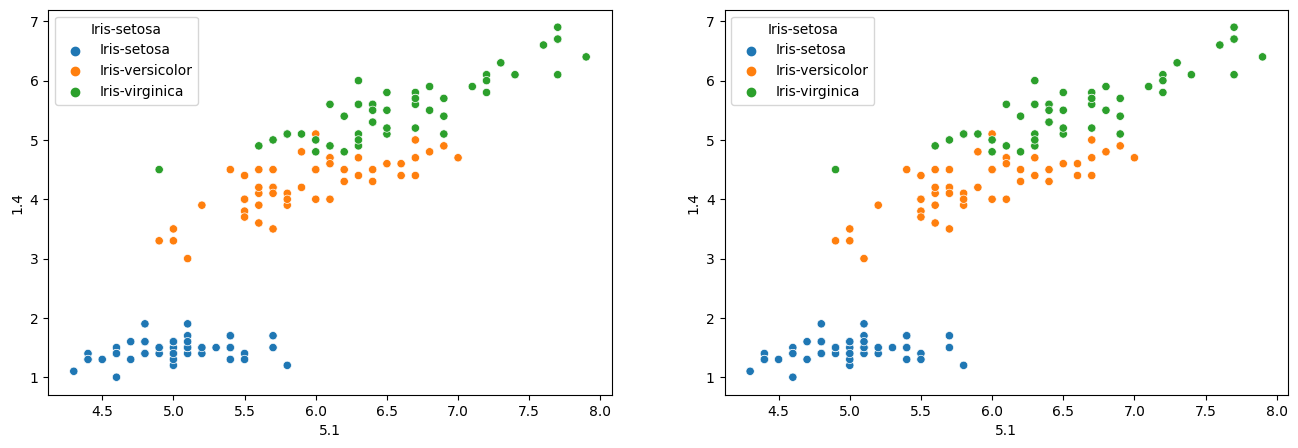

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='5.1',y='1.4',data=df,hue='Iris-setosa',ax=ax1)
sns.scatterplot(x='5.1',y='1.4',data=df,hue='Iris-setosa',ax=ax2)

In [13]:
df.shape

(149, 5)

In [14]:
df.columns
df.info()
df.isnull().sum()
df['Iris-setosa'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


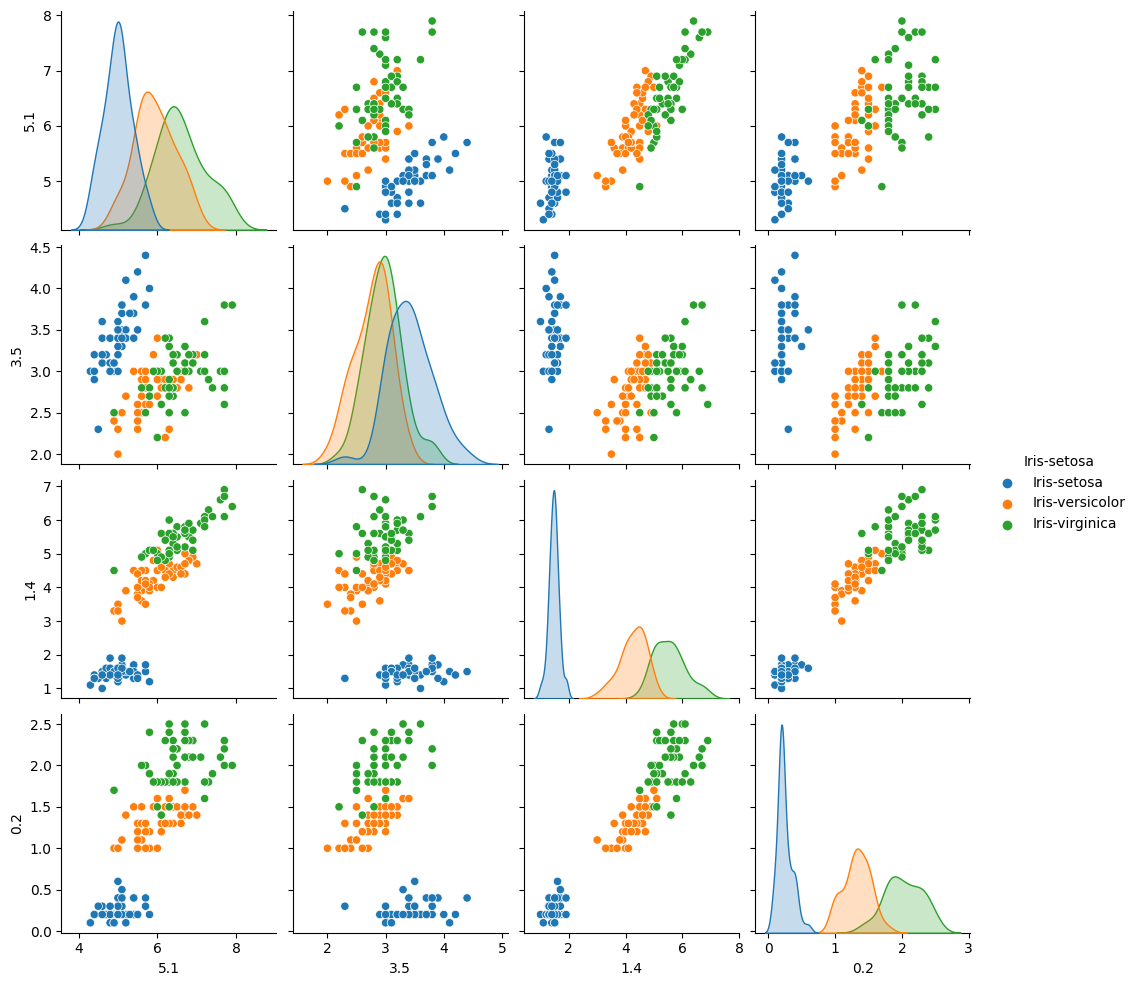

In [42]:
sns.pairplot(df,hue="Iris-setosa")

<Axes: ylabel='0.2'>

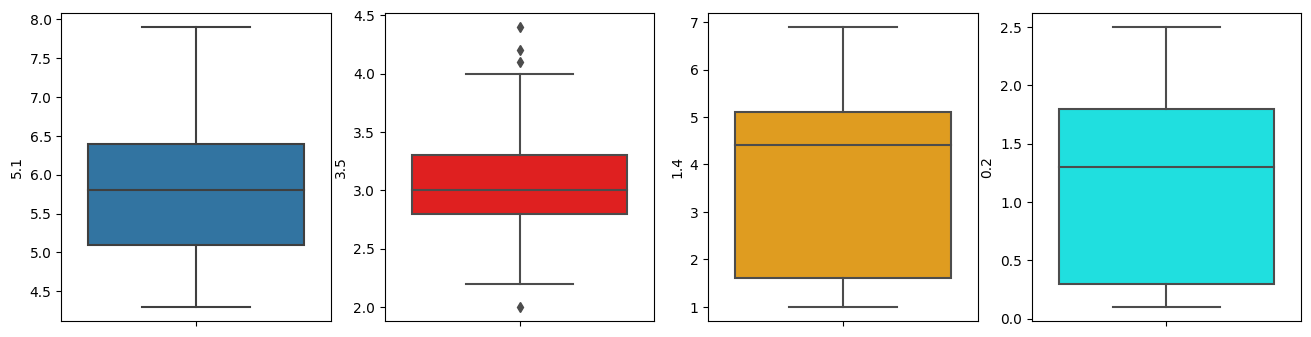

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='5.1')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='3.5',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='1.4',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='0.2',color='cyan')

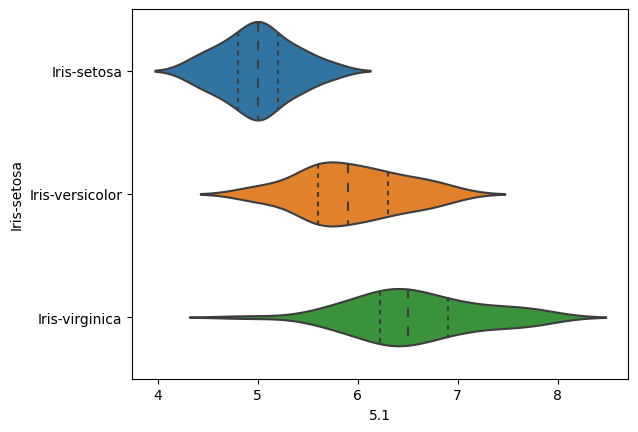

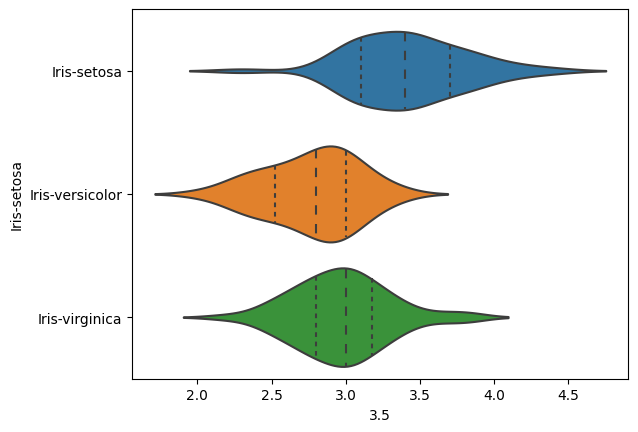

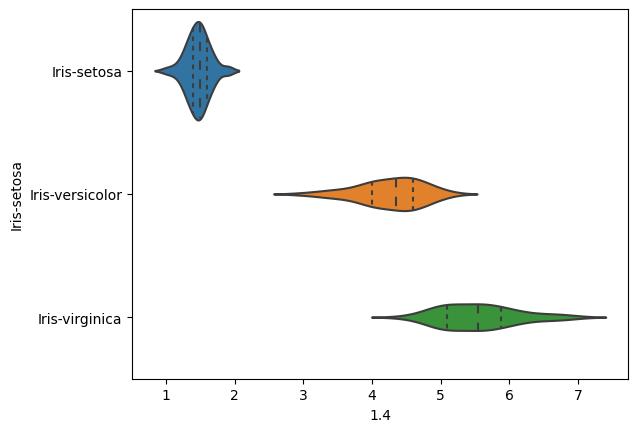

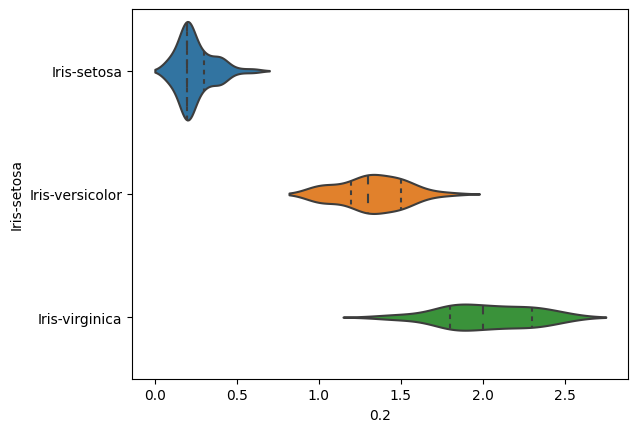

In [18]:
sns.violinplot(y='Iris-setosa', x='5.1', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Iris-setosa', x='3.5', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Iris-setosa', x='1.4', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Iris-setosa', x='0.2', data=df, inner='quartile')
plt.show()

<ipython-input-19-c06bbf75caf3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm')


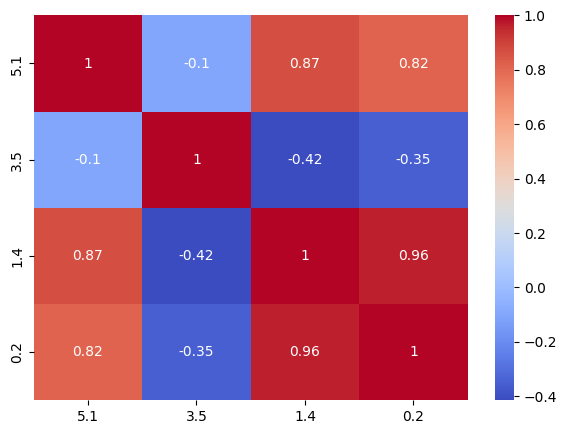

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['Iris-setosa'] = le.fit_transform = (df['Iris-setosa'])
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Iris-setosa'])
Y = df['Iris-setosa']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)




















In [23]:
# Initialize a Logistic Regression
lg= LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Predict on the test set and calculate accuracy
from sklearn.metrics import accuracy_score
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)


In [43]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

In [44]:
print('Logistic Regression')
print(f'Accuracy: {round(score*100,2)}%')

Logistic Regression
Accuracy: 95.56%


In [27]:
# Initialize a Linear SVC
rbf_sv= SVC()
rbf_sv.fit(x_train,y_train)
L_svc=LinearSVC()

In [28]:
L_svc.fit(x_train,y_train)
# Predict on the test set and calculate accuracy
y_pred=L_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
print('Linear SVC')
print(f'Accuracy: {round(score*100,2)}%')

Linear SVC
Accuracy: 97.78%


In [30]:
DTC = DecisionTreeClassifier()
DTC=DTC.fit(x_train,y_train)
# Predict on the test set and calculate accuracy
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [31]:
print('Decision Tree Classifier')
print(f'Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
Accuracy: 95.56%


In [32]:
NB= MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# Predict on the test set and calculate accuracy
y_pred=NB.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [33]:
import pandas as pd
from sklearn.metrics import classification_report
print('NB')

print(f'Accuracy: {round(score*100,2)}%')

NB
Accuracy: 95.56%


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [35]:
import pandas as pd
from sklearn.metrics import classification_report
print('NB')

print(f'Accuracy: {round(score*100,2)}%')

NB
Accuracy: 95.56%


In [36]:
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Predict on the test set and calculate accuracy
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [45]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
print('KNN')
print(f'Accuracy: {round(score*100,2)}%')

KNN
Accuracy: 95.56%
